In [77]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

columns = list(df.columns)
remove = {'PRIMARY_KEY', 'STATE', 'YEAR', 'AVG_READING_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_MATH_4_SCORE'}
columns = [e for e in columns if e not in remove]

states = df['STATE'].unique()

for state in states:
    df.loc[df['STATE'] == state, columns] = df.loc[df['STATE'] == state, columns].interpolate()

df.dropna(inplace=True)

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [31]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,...,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,...,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,...,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,...,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,...,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,...,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,...,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


- Average state revenue is more than average federal revenue
- Instructor expenditure is around half of total expenditure
- Average math scores are higher than average reading scores but have a higher standard deviation


2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

Text(0, 0.5, 'Total Expenditure')

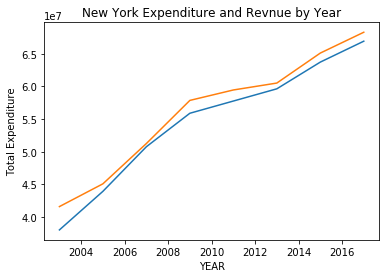

In [32]:
df_ny = df[df['STATE'] == 'NEW_YORK']

lp = sns.lineplot(x = 'YEAR', y = 'TOTAL_REVENUE', data = df_ny)
lp = sns.lineplot(x = 'YEAR', y = 'TOTAL_EXPENDITURE', data = df_ny)
lp.set_title('New York Expenditure and Revnue by Year')
lp.set_ylabel('Total Expenditure')

Seems like there was a dip in both revenue and expenditure increase around the 2008 financial crisis

3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [33]:
df_ny.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,8.000000,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,...,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000
mean,2010.000000,2.709626e+06,5.457747e+07,3.363548e+06,2.318572e+07,2.802821e+07,5.614065e+07,3.522797e+07,1.361608e+07,1.386538e+06,...,197639.125000,204979.625000,183902.875000,1.604326e+06,834394.125000,2.486368e+06,238.437914,280.777705,222.980209,264.576144
std,4.898979,9.999148e+04,9.815206e+06,7.559203e+05,3.391526e+06,6.465979e+06,9.395270e+06,6.742033e+06,2.116653e+06,1.584178e+05,...,4688.357264,8340.518243,9961.926584,3.894470e+04,16746.590207,2.891593e+04,2.495844,1.088633,0.884478,7.502302
min,2003.000000,2.590945e+06,3.803308e+07,2.591430e+06,1.750962e+07,1.793203e+07,4.160339e+07,2.478638e+07,1.000084e+07,1.156927e+06,...,191647.000000,197997.000000,163362.000000,1.550122e+06,820326.000000,2.459460e+06,235.548457,279.716254,221.884015,255.010828
25%,2006.500000,2.631100e+06,4.905602e+07,3.084479e+06,2.193504e+07,2.387999e+07,4.971221e+07,3.056596e+07,1.230459e+07,1.284516e+06,...,195429.750000,198516.750000,182726.750000,1.589670e+06,820402.000000,2.471847e+06,236.580214,280.004229,222.417410,257.539584
50%,2010.000000,2.687050e+06,5.681945e+07,3.233572e+06,2.341035e+07,2.818312e+07,5.864919e+07,3.651478e+07,1.427033e+07,1.416015e+06,...,196633.500000,202228.500000,188969.500000,1.601015e+06,826095.000000,2.474228e+06,237.846960,280.297102,222.670752,265.863613
75%,2013.500000,2.770338e+06,6.064599e+07,3.344194e+06,2.580147e+07,3.322705e+07,6.165311e+07,3.955606e+07,1.506379e+07,1.481995e+06,...,199866.000000,207907.750000,189691.750000,1.611931e+06,851638.500000,2.487477e+06,240.422637,281.717947,223.767361,270.874746
max,2017.000000,2.879228e+06,6.691266e+07,5.118477e+06,2.743759e+07,3.610526e+07,6.828203e+07,4.396452e+07,1.588350e+07,1.599317e+06,...,206912.000000,219335.000000,190732.000000,1.681670e+06,858087.000000,2.543604e+06,242.543018,282.576915,224.368749,274.307732


New York students are on average better at math than reading, but let's take a further look see this difference split by year.

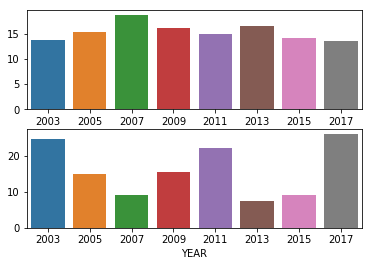

In [41]:
f, axes = plt.subplots(2, 1)
sns.barplot(x = df_ny['YEAR'], y = df_ny['AVG_MATH_4_SCORE'] - df_ny['AVG_READING_4_SCORE'], ax = axes[0])
sns.barplot(x = df_ny['YEAR'], y = df_ny['AVG_MATH_8_SCORE'] - df_ny['AVG_READING_8_SCORE'], ax = axes[1])

4. What are the distributions of the math and reading scores in the sample?

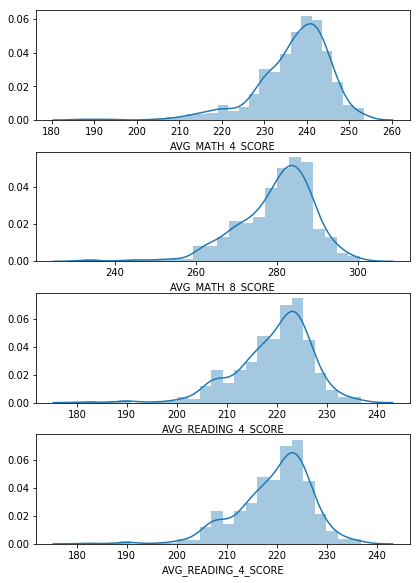

In [74]:
f, axes = plt.subplots(4, 1, figsize=(6,8))
plt.tight_layout()
sns.distplot(df['AVG_MATH_4_SCORE'], ax = axes[0])
sns.distplot(df['AVG_MATH_8_SCORE'], ax = axes[1])
sns.distplot(df['AVG_READING_4_SCORE'], ax = axes[2])
sns.distplot(df['AVG_READING_4_SCORE'], ax = axes[3])

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

Text(0.5, 1.0, 'AVG_READING_8_SCORE (Median)')

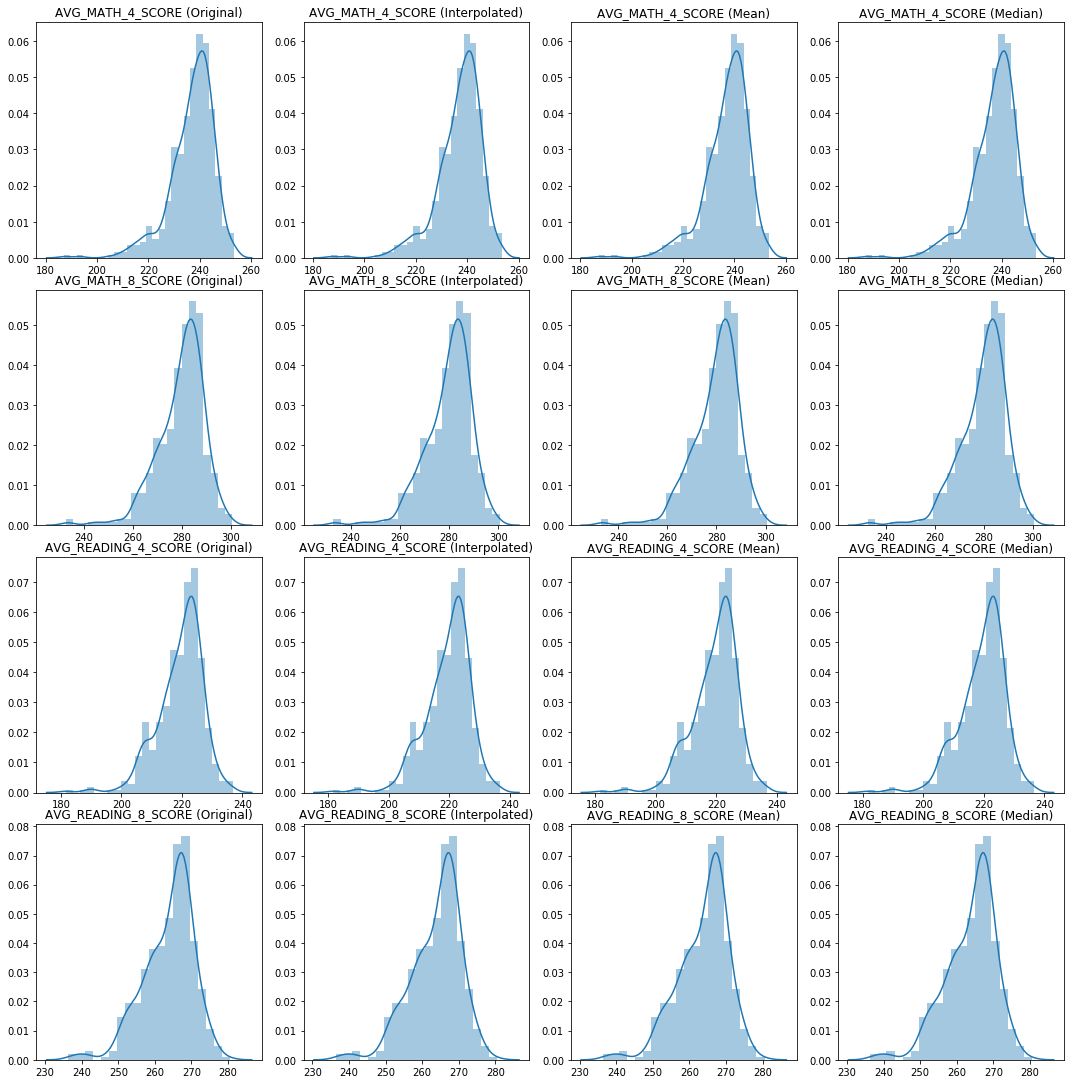

In [108]:
f, axes = plt.subplots(4, 4, figsize=(15, 15))
plt.tight_layout()

sns.distplot(df['AVG_MATH_4_SCORE'].dropna(), ax = axes[0, 0], axlabel = '').set_title('AVG_MATH_4_SCORE (Original)')
sns.distplot(df['AVG_MATH_4_SCORE'].interpolate(), ax = axes[0, 1], axlabel = '').set_title('AVG_MATH_4_SCORE (Interpolated)')
sns.distplot(df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].mean()), ax = axes[0, 2], axlabel = '').set_title('AVG_MATH_4_SCORE (Mean)')
sns.distplot(df['AVG_MATH_4_SCORE'].fillna(df['AVG_MATH_4_SCORE'].median()), ax = axes[0, 3], axlabel = '').set_title('AVG_MATH_4_SCORE (Median)')

sns.distplot(df['AVG_MATH_8_SCORE'].dropna(), ax = axes[1, 0], axlabel = '').set_title('AVG_MATH_8_SCORE (Original)')
sns.distplot(df['AVG_MATH_8_SCORE'].interpolate(), ax = axes[1, 1], axlabel = '').set_title('AVG_MATH_8_SCORE (Interpolated)')
sns.distplot(df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].mean()), ax = axes[1, 2], axlabel = '').set_title('AVG_MATH_8_SCORE (Mean)')
sns.distplot(df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].median()), ax = axes[1, 3], axlabel = '').set_title('AVG_MATH_8_SCORE (Median)')

sns.distplot(df['AVG_READING_4_SCORE'].dropna(), ax = axes[2, 0], axlabel = '').set_title('AVG_READING_4_SCORE (Original)')
sns.distplot(df['AVG_READING_4_SCORE'].interpolate(), ax = axes[2, 1], axlabel = '').set_title('AVG_READING_4_SCORE (Interpolated)')
sns.distplot(df['AVG_READING_4_SCORE'].fillna(df['AVG_READING_4_SCORE'].mean()), ax = axes[2, 2], axlabel = '').set_title('AVG_READING_4_SCORE (Mean)')
sns.distplot(df['AVG_READING_4_SCORE'].fillna(df['AVG_READING_4_SCORE'].median()), ax = axes[2, 3], axlabel = '').set_title('AVG_READING_4_SCORE (Median)')

sns.distplot(df['AVG_READING_8_SCORE'].dropna(), ax = axes[3, 0], axlabel = '').set_title('AVG_READING_8_SCORE (Original)')
sns.distplot(df['AVG_READING_8_SCORE'].interpolate(), ax = axes[3, 1], axlabel = '').set_title('AVG_READING_8_SCORE (Interpolated)')
sns.distplot(df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].mean()), ax = axes[3, 2], axlabel = '').set_title('AVG_READING_8_SCORE (Mean)')
sns.distplot(df['AVG_READING_8_SCORE'].fillna(df['AVG_READING_8_SCORE'].median()), ax = axes[3, 3], axlabel = '').set_title('AVG_READING_8_SCORE (Median)')